In [1]:
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg
import os
# import utils
import warnings
warnings.filterwarnings('ignore')

In [2]:
source_dir = 'C:/Users/scanimage/Downloads'
data=io.loadmat(os.path.join(source_dir,"BCI13_combined_sept2021.mat"))

In [3]:
n_days = data['data'].shape[1]

cni = [data['data'][:, i]['cn'][0][0][0] - 1 for i in range(n_days)] # -1 to account for matlab indexing
dFF = [data['data'][:, i]['df'][0] for i in range(n_days)]
dist = [data['data'][:, i]['dist'][0] for i in range(n_days)]
meanImg = [data['data'][:, i]['IM'][0] for i in range(n_days)]
raw = [data['data'][:, i]['raw'][0] for i in range(n_days)]
F_trialwise = [data['data'][:, i]['F'][0] for i in range(n_days)]
tsta = [data['data'][:, i]['tsta'][0] for i in range(n_days)]
total_steps = [dFF[i].shape[0] for i in range(n_days)]
n_trials = [F_trialwise[i].shape[-1] for i in range(n_days)]
epoch = [data['data'][:, i]['epoch'][0] for i in range(n_days)]
lkeys = [[1,3], 1, 4, 2]
epoch_closedloop = [np.isin(epoch[i],lkeys[i])[0] for i in range(n_days)]

(240, 1)

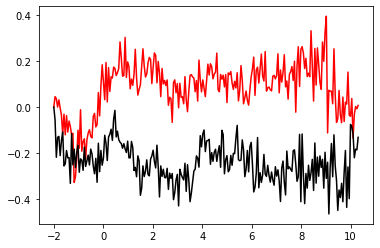

In [29]:
day_ind = 1
yesterday = np.nanmean(F_trialwise[day_ind-1][0:240,:,:], axis=2)
today = np.nanmean(F_trialwise[day_ind][0:240,:,:], axis=2)
n=today.shape
n = n[1]
x=np.transpose(tsta[day_ind][:,0:240])
for i in range(n):    
    today[:,i] = today[:,i] - np.nanmean(today[0:40,i],0)

for i in range(n):    
    yesterday[:,i] = yesterday[:,i] - np.nanmean(yesterday[0:2,i],0)
plt.plot(x,today[:,cni[day_ind]]-today[0,cni[day_ind]],color='r')
plt.plot(x,yesterday[:,cni[day_ind]]-yesterday[0,cni[day_ind]],color='k')
x.shape

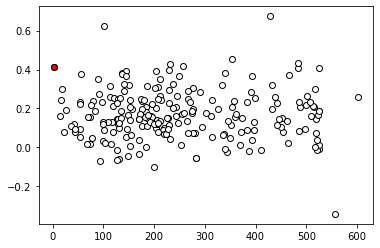

In [30]:
d=np.nanmean(today[39:239,:],axis=0)-np.nanmean(yesterday[39:239,:],axis=0)
x = dist[day_ind]
np.shape(np.transpose(x))
x = np.transpose(x)
plt.plot(x,d,marker='o',color='k',linestyle='none',markerfacecolor='w')
plt.plot(x[cni[day_ind]],d[cni[day_ind]],marker='o',color='k',linestyle='none',markerfacecolor='r')